In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [156]:
train_data = pd.read_csv('../data/public.train.csv')
test_data = pd.read_csv('../data/public.test.csv')

In [157]:
train_data_copy = train_data.copy()
y = train_data_copy['发电量']
X = train_data_copy.drop(['ID','发电量'], axis=1)

# 简单抽样   但是根据题干尝试使用分层抽样
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=233, 
#                                                    )

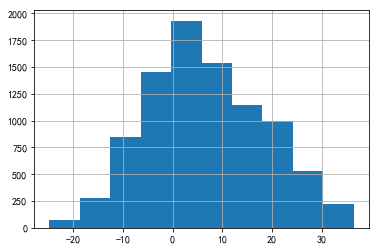

In [158]:
%matplotlib inline
X['板温'].hist(bins=10)

In [159]:
X["板温分层"] = np.ceil(X['板温'])

X["板温分层"]

0      -19.0
1      -18.0
2      -17.0
3      -15.0
4      -14.0
5      -14.0
6      -11.0
7      -10.0
8      -10.0
9       -8.0
10      -5.0
11      -4.0
12      -3.0
13      -3.0
14      -2.0
15      -1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       2.0
22       4.0
23       4.0
24       5.0
25       5.0
26       6.0
27       6.0
28       6.0
29       7.0
        ... 
8970    29.0
8971    30.0
8972    31.0
8973    31.0
8974    32.0
8975    32.0
8976    33.0
8977    32.0
8978    32.0
8979    32.0
8980    32.0
8981    33.0
8982    33.0
8983    34.0
8984    33.0
8985    33.0
8986    33.0
8987    34.0
8988    34.0
8989    34.0
8990    32.0
8991    32.0
8992    33.0
8993    35.0
8994    35.0
8995    36.0
8996    37.0
8997    37.0
8998    37.0
8999     1.0
Name: 板温分层, Length: 9000, dtype: float64

In [160]:
X["板温分层"].value_counts()

 5.0     366
 1.0     347
 6.0     320
 3.0     315
 4.0     302
 7.0     297
 9.0     285
 8.0     271
 2.0     268
-0.0     254
-5.0     247
-2.0     242
 10.0    238
-3.0     232
-1.0     227
-6.0     225
-4.0     216
 17.0    212
 19.0    210
 13.0    208
 11.0    199
-7.0     197
 12.0    196
 16.0    194
 18.0    181
 21.0    173
 15.0    167
 23.0    167
-8.0     162
 22.0    159
        ... 
 24.0    131
 25.0    123
-9.0     117
-10.0    116
 26.0    114
 27.0     95
-11.0     94
 29.0     79
 28.0     73
-12.0     68
 31.0     65
-13.0     65
 32.0     55
 30.0     52
-14.0     51
 33.0     50
-15.0     44
-16.0     34
 34.0     32
-17.0     31
-18.0     24
 35.0     23
-19.0     20
-20.0     16
 36.0     12
-22.0      9
-21.0      9
 37.0      7
-23.0      6
-24.0      2
Name: 板温分层, Length: 62, dtype: int64

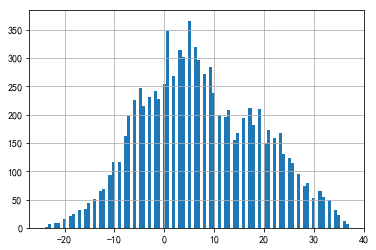

In [161]:
X['板温分层'].hist(bins=100 )

In [162]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X['板温分层']):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]


TRAIN: [7537  916 6125 ... 1032 1642 3052] TEST: [6417 4417 7637 ...  766  115 4380]


In [163]:
(X_train['板温分层'].value_counts() / len(X_train['板温分层'])).head()

5.0    0.040694
1.0    0.038611
6.0    0.035556
3.0    0.035000
4.0    0.033472
Name: 板温分层, dtype: float64

In [164]:
(X['板温分层'].value_counts() / len(X['板温分层'])).head()

5.0    0.040667
1.0    0.038556
6.0    0.035556
3.0    0.035000
4.0    0.033556
Name: 板温分层, dtype: float64

In [165]:
def plate_temperature_cat_proportions(data):
    return data["板温分层"].value_counts() / len(data)

train_set, test_set = train_test_split(X, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": plate_temperature_cat_proportions(X),
    "Stratified": plate_temperature_cat_proportions(X_train),
    "Random": plate_temperature_cat_proportions(train_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [166]:
compare_props.head(20)

,Overall,Stratified,Random,Rand. %error,Strat. %error
-24.0,0.000222,0.000278,0.000278,25.000000,25.000000
-23.0,0.000667,0.000694,0.000694,4.166667,4.166667
-22.0,0.001000,0.000972,0.000972,-2.777778,-2.777778
-21.0,0.001000,0.000972,0.000833,-16.666667,-2.777778
-20.0,0.001778,0.001806,0.001528,-14.062500,1.562500
-19.0,0.002222,0.002222,0.002500,12.500000,0.000000
-18.0,0.002667,0.002639,0.002639,-1.041667,-1.041667
-17.0,0.003444,0.003472,0.003611,4.838710,0.806452
-16.0,0.003778,0.003750,0.003194,-15.441176,-0.735294
-15.0,0.004889,0.004861,0.005000,2.272727,-0.568182


In [167]:
X_train['板温分层'].head()

7537    12.0
916     -2.0
6125    23.0
5063    -8.0
1499     3.0
Name: 板温分层, dtype: float64

In [168]:
X_test['板温分层'].head()

6417    19.0
4417    -3.0
7637    16.0
4100    -7.0
4259    14.0
Name: 板温分层, dtype: float64

In [169]:
for set_ in (X_train, X_test):
    set_.drop(["板温分层"], axis=1, inplace=True)

#     for set in (strat_train_set, strat_test_set):
#     set.drop(["income_cat"], axis=1, inplace=True)

In [170]:
try:
    X_train['板温分层'].head(), X_test['板温分层'].head()
except KeyError:
    print("已删除")

已删除


In [171]:
X_train.head(), len(X_train)

(         板温  现场温度  光照强度    转换效率   转换效率A   转换效率B   转换效率C  电压A  电压B  电压C   电流A  \
 7537  11.76  10.8   166   18.22   18.91   17.66   18.09  650  647  644  1.45   
 916   -2.10 -11.9   307   40.83   40.88   40.65   40.96  693  693  689  5.18   
 6125  22.14   4.8   687   23.44   23.30   23.16   23.85  624  621  621  8.00   
 5063  -8.66 -12.0   296   29.26   28.96   28.48   30.35  720  719  718  3.33   
 1499   2.43  -0.9     8  530.69  524.66  527.45  539.97  685  681  682  1.78   
 
        电流B   电流C      功率A      功率B      功率C     平均功率   风速   风向  
 7537  1.36  1.40   942.50   879.92   901.60   908.01  4.7  277  
 916   5.15  5.22  3589.74  3568.95  3596.58  3585.09  1.5   62  
 6125  7.99  8.23  4992.00  4961.79  5110.83  5021.54  1.7  226  
 5063  3.28  3.50  2397.60  2358.32  2513.00  2422.97  1.8   44  
 1499  1.80  1.84  1219.30  1225.80  1254.88  1233.33  1.7  280  , 7200)

In [172]:
y_train.head(), len(y_train)

(7537     1.838621
 916      7.397647
 6125    10.604942
 5063     4.955602
 1499     2.391720
 Name: 发电量, dtype: float64, 7200)

数据探索和可视化、发现规律


In [173]:
train_data_copy = train_data.copy()
corr_matrix = train_data_copy.corr()

In [174]:
corr_matrix['发电量']

ID       0.062720
板温       0.519033
现场温度     0.009822
光照强度     0.879283
转换效率    -0.052606
转换效率A   -0.041263
转换效率B   -0.033276
转换效率C   -0.041772
电压A     -0.021094
电压B     -0.029620
电压C     -0.025307
电流A      0.989233
电流B      0.120045
电流C      0.116020
功率A      0.098949
功率B      0.085379
功率C      0.116369
平均功率     0.168907
风速       0.128217
风向       0.197038
发电量      1.000000
Name: 发电量, dtype: float64

发电量 主要相关属性: 板温, 光照强度, 电流A 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4fb539f28>,
      dtype=object)

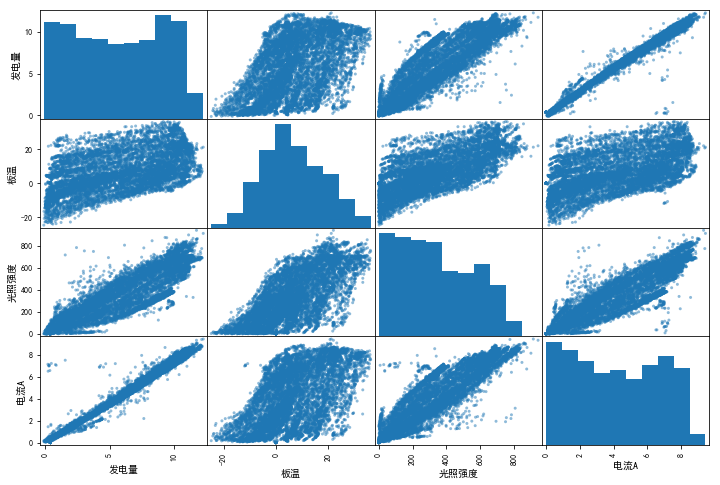

In [175]:
from pandas.plotting import scatter_matrix
attributes = ["发电量", "板温", "光照强度",
              "电流A"]
scatter_matrix(train_data[attributes], figsize=(12, 8))

最有希望预测发电量是电流A

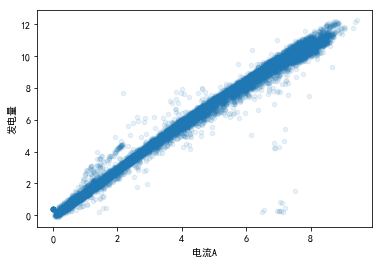

In [176]:
train_data_copy.plot(kind="scatter", x="电流A",y="发电量",
             alpha=0.1)

这张图说明了:
<br>
1. 相关性非常高, 数据十分集中
2. 在电流6-8之间存在部分离群值, 尝试去除, 提高算法的精确度

In [177]:
# 电流A 与 发电量的离群值
current_A_outlier = list(train_data_copy[(train_data['电流A'] > 6) & (train_data_copy['电流A'] < 8) & (train_data_copy['发电量'] < 4)].index)

属性组合实验

In [178]:
train_data_copy['电流A*电压A'] = train_data_copy['电流A'] * train_data_copy['电压A']
train_data_copy['电流A*电压A'] == train_data_copy['功率A']

train_data_copy['电流B*电压B'] = train_data_copy['电流B'] * train_data_copy['电压B']
train_data_copy['电流C*电压C'] = train_data_copy['电流C'] * train_data_copy['电压C']
# 删除一部分 不符合电流 * 电压 = 功率的值
drop_a_list = list(train_data_copy[train_data_copy['电流A*电压A'] != train_data_copy['功率A']].index)
drop_b_list = list(train_data_copy[train_data_copy['电流B*电压B'] != train_data_copy['功率B']].index)
drop_c_list = list(train_data_copy[train_data_copy['电流C*电压C'] != train_data_copy['功率C']].index)

In [179]:
len(drop_a_list), len(drop_b_list), len(drop_c_list)

(2186, 2229, 2285)

In [180]:
corr_matrix = train_data_copy.corr()
corr_matrix['发电量']

ID         0.062720
板温         0.519033
现场温度       0.009822
光照强度       0.879283
转换效率      -0.052606
转换效率A     -0.041263
转换效率B     -0.033276
转换效率C     -0.041772
电压A       -0.021094
电压B       -0.029620
电压C       -0.025307
电流A        0.989233
电流B        0.120045
电流C        0.116020
功率A        0.098949
功率B        0.085379
功率C        0.116369
平均功率       0.168907
风速         0.128217
风向         0.197038
发电量        1.000000
电流A*电压A    0.098949
电流B*电压B    0.085379
电流C*电压C    0.116369
Name: 发电量, dtype: float64

属性组合之后, 相关性没有变化 = =

In [181]:
# 风量=风速×风管的截面积
train_data_copy['风管的截面积'] = train_data_copy['风向'] / train_data_copy['风速']
corr_matrix = train_data_copy.corr()
corr_matrix['发电量']

ID         0.062720
板温         0.519033
现场温度       0.009822
光照强度       0.879283
转换效率      -0.052606
转换效率A     -0.041263
转换效率B     -0.033276
转换效率C     -0.041772
电压A       -0.021094
电压B       -0.029620
电压C       -0.025307
电流A        0.989233
电流B        0.120045
电流C        0.116020
功率A        0.098949
功率B        0.085379
功率C        0.116369
平均功率       0.168907
风速         0.128217
风向         0.197038
发电量        1.000000
电流A*电压A    0.098949
电流B*电压B    0.085379
电流C*电压C    0.116369
风管的截面积    -0.037732
Name: 发电量, dtype: float64

为算法准备数据

In [182]:
train_data = train_data.copy()
train_data.head()

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,...,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向,发电量
0,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,...,1.34,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272,1.437752
1,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,...,1.55,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275,1.692575
2,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,...,1.75,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283,1.975787
3,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,...,2.02,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280,2.370656
4,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,...,2.13,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280,2.532091


In [183]:
# 去重 
train_data.drop_duplicates()
len(train_data)
# 去除缺失值
train_data.dropna()
len(train_data)

9000

In [184]:
def process_train_data(train_data):
    train_data['功率A'] = train_data['电流A'] * train_data['电压A']
    train_data['功率B'] = train_data['电流B'] * train_data['电压B']
    train_data['功率C'] = train_data['电流C'] * train_data['电压C']
#     train_data.drop(['功率A', '功率B', '功率C'], axis=1)
    return train_data
processed_train_data = process_train_data(train_data)


In [185]:
processed_train_data.head()

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,...,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向,发电量
0,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,...,1.34,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272,1.437752
1,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,...,1.55,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275,1.692575
2,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,...,1.75,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283,1.975787
3,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,...,2.02,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280,2.370656
4,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,...,2.13,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280,2.532091


In [187]:
train_data = processed_train_data.copy()
current_A_outlier = list(train_data_copy[(train_data['电流A'] > 6) & (train_data_copy['电流A'] < 8) & (train_data_copy['发电量'] < 4)].index)
train_data.drop(index=current_A_outlier)

,ID,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,...,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向,发电量
0,10,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,...,1.34,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272,1.437752
1,11,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,...,1.55,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275,1.692575
2,12,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,...,1.75,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283,1.975787
3,14,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,...,2.02,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280,2.370656
4,15,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,...,2.13,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280,2.532091
5,16,-14.10,-16.2,76,61.97,77.59,25.80,82.53,733,728,...,2.21,0.74,2.38,1619.93,538.72,1723.12,1293.92,0.9,278,2.779719
6,19,-11.25,-15.9,96,71.51,70.09,70.09,74.35,726,726,...,2.57,2.57,2.73,1865.82,1865.82,1979.25,1903.63,1.5,277,3.832378
7,20,-10.77,-15.8,100,70.04,69.27,68.43,72.42,726,720,...,2.65,2.64,2.79,1923.90,1900.80,2011.59,1945.43,1.5,281,3.956692
8,22,-10.77,-15.8,100,5699.37,16924.86,162.65,10.59,65382,7,...,7.19,645.39,2.75,470096.58,4517.73,294.25,158302.85,1.5,281,5.440741
9,24,-8.33,-14.7,122,63.99,62.47,62.96,66.53,721,717,...,2.96,3.00,3.17,2134.16,2151.00,2272.89,2186.02,0.7,278,4.501339


In [ ]:
# def generate_train_data(train_data, test_data, poly=False, select=False):
#     y = train_data['发电量']
#     X = train_data.drop(['发电量','ID'], axis=1)
#     sub_data = test_data.drop(['ID'], axis=1)

#     if poly:
#         from sklearn.preprocessing import PolynomialFeatures
#         poly = PolynomialFeatures(degree=2, interaction_only=True)
#         X = poly.fit_transform(X)
#         sub_data = poly.transform(sub_data)
        
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#     if select:
        from sklearn.feature_selection import SelectFromModel
        sm = SelectFromModel(GradientBoostingRegressor(random_state=2))
        X_train = sm.fit_transform(X_train, y_train)
        X_test = sm.transform(X_test)
        sub_data = sm.transform(sub_data)
        
#     return X_train, X_test, y_train, y_test, sub_data

In [232]:
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1)
sub_data = test_data.drop(['ID'], axis=1)


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X = poly.fit_transform(X)
sub_data = poly.transform(sub_data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import SelectFromModel
sm = SelectFromModel(GradientBoostingRegressor(random_state=2))
X_train = sm.fit_transform(X_train, y_train)
X_test = sm.transform(X_test)
sub_data = sm.transform(sub_data)

In [233]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

hyperparameters = { 'randomforestregressor__max_features' : [ 'sqrt'],
                  'randomforestregressor__max_depth': [None]}


# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : [ 'sqrt'],
                  'randomforestregressor__max_depth': [None]}
 

# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['sqrt'], 'randomforestregressor__max_depth': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [234]:
pred = clf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))

0.9979319240573962
0.025000083775688964


In [236]:
joblib.dump(clf, 'day_2.pkl')
# 10. 将test_data的训练数据输入模型，计算出结果，并保存

clf = joblib.load("day_2.pkl")

df_result = pd.DataFrame()
df_result['ID'] = list(test_data['ID'])
test_feature = test_data.drop('ID', axis=1)
pre = clf.predict(sub_data)

df_result['Score'] = pre
df_result.to_csv('../submit/submit_version3.csv', index=False, header=False, float_format='%.8f')